In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.seasonal as smts
import statsmodels.regression.linear_model as lm
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acovf

In [ ]:
# prompt: create a dataframe from dictionary

import pandas as pd
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
df = pd.DataFrame.from_dict(data)
print(df)


In [ ]:
time = np.array(range(1,101))
first_y = np.random.normal(size=100)

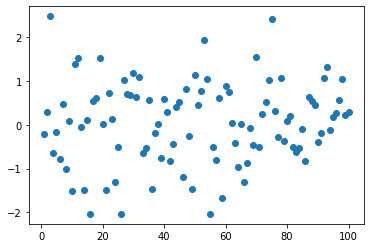

In [ ]:
plt.scatter(time,first_y)
plt.show()

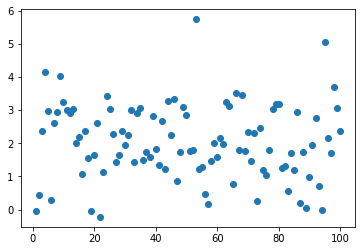

In [ ]:
second_y =2 + np.random.normal(size=100)
plt.scatter(time,second_y)

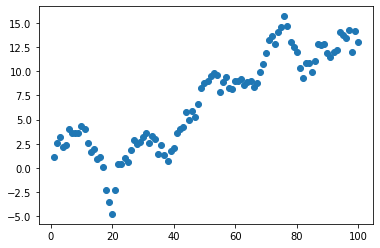

In [ ]:
third_y=[np.random.normal()]
for i in range(1,100):
    third_y.append(third_y[i-1] + np.random.normal())
plt.scatter(time,third_y)

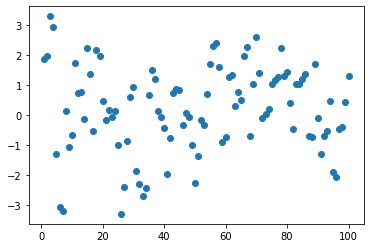

In [ ]:
epsilon=np.random.normal(size=100)

fourth_y=[epsilon[0]]
for i in range(1,100):
   fourth_y.append(epsilon[i]+epsilon[i-1])
plt.scatter(time,fourth_y)

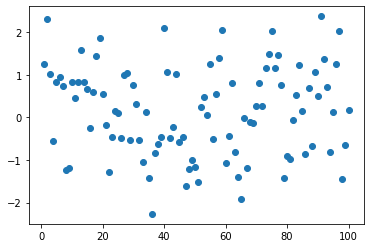

In [ ]:
fifth_y=[np.random.normal()]
for i in range(1,100):
    fifth_y.append(0.5*fifth_y[i-1] + np.random.normal())
plt.scatter(time,fifth_y)

In [ ]:
time = np.array(range(1000))


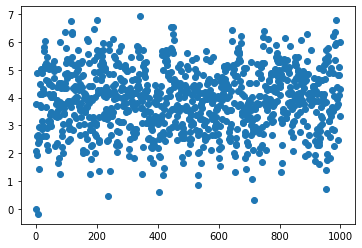

In [ ]:
ar_1 = []
ar_1.append(0)
for i in range(999):
    ar_1.append(2+(0.5*ar_1[i])+np.random.normal())
plt.scatter(time,ar_1)


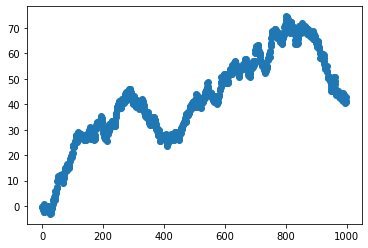

In [ ]:
y_ar = [np.random.normal()]
for i in range(1,1000):
        y_ar.append(y_ar[i-1] + np.random.normal())
plt.scatter(time,y_ar)

In [ ]:
df_ar_1 = pd.DataFrame(index=time,data=ar_1)
df_ar_1

,0
0,0.000000
1,2.092920
2,3.771683
3,4.886200
4,2.632177
...,...
995,4.097846
996,4.798642
997,4.322370
998,3.335462


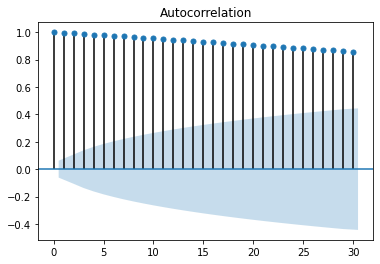

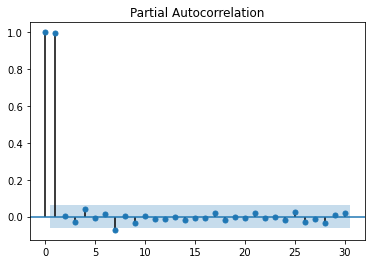

In [ ]:
df_y_ar = pd.DataFrame(index=time,data=y_ar)
plot_acf(df_y_ar)
plot_pacf(df_y_ar);

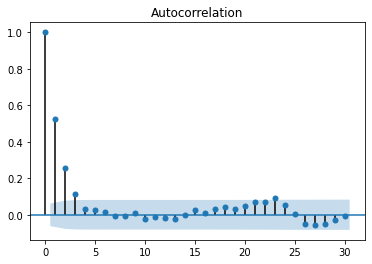

In [ ]:
plot_acf(df_ar_1)
plt.show()

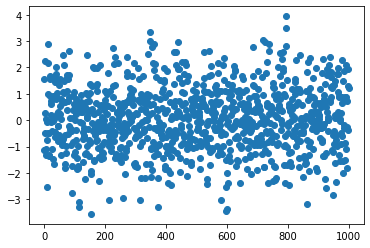

In [ ]:
et = np.random.normal(size=1001)
ma_1 = [et[i+1]+0.7*et[i] for i in range(1000)]
plt.scatter(time,ma_1)


<function matplotlib.pyplot.show>

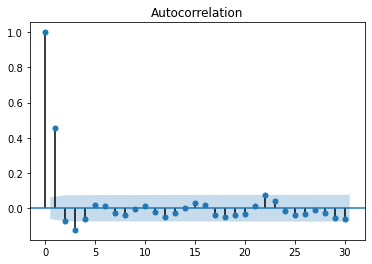

In [ ]:
df_ma_1 = pd.DataFrame(index=time, data=ma_1)
plot_acf(df_ma_1)
plt.show

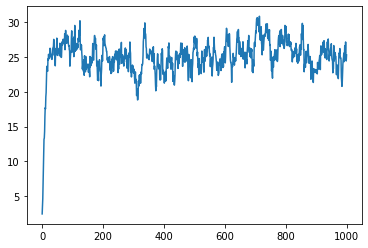

In [ ]:
ar_2 = []
ar_2.append(2.5+np.random.normal())
ar_2.append(2.5 + 0.7*ar_2[0] + np.random.normal())
for i in range(2,1000):
    ar_2.append(2.5 + 0.7*ar_2[i-1] + 0.2*ar_2[i-2] + np.random.normal())
plt.plot(time, ar_2)


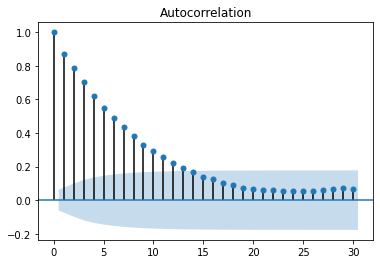

In [ ]:
df_ar_2 = pd.DataFrame(index=time,data=ar_2)
plot_acf(df_ar_2)
plt.show()

In [ ]:
acov_ar_2 = acovf(ar_2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


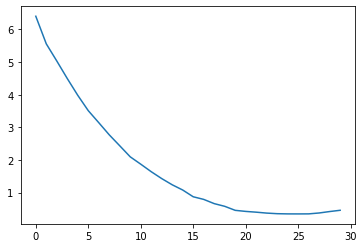

In [ ]:
plt.plot(time[:30],acov_ar_2[:30])

#MOM Estimation

In [ ]:
et = np.random.normal(size=10101)
time = np.array(range(10000))



1)








In [ ]:
yt_ma_1 = []
yt_ma_1.append(2 + et[0])
for i in range(1,550):
    yt_ma_1.append(2 + et[i] + 0.5*et[i-1])
yt_ma_1 = yt_ma_1[50:]

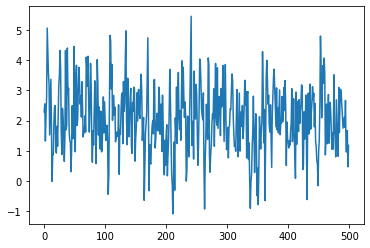

In [ ]:
plt.plot(yt_ma_1)

In [ ]:
acov_ma_1 = acovf(yt_ma_1)
yt_mu = np.mean(yt_ma_1)
gamma_0 = acov_ma_1[0]
gamma_1 = acov_ma_1[1]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [ ]:
print(yt_mu,
gamma_0,
gamma_1)

2.05026553468569 1.2032264616442083 0.5019399916064204


In [ ]:
theta_hat_1 = (gamma_0 + np.sqrt(gamma_0**2 - 4 * gamma_1**2))/2*gamma_1
theta_hat_2 = (gamma_0 - np.sqrt(gamma_0*gamma_0 -4*gamma_1*gamma_1))/2*gamma_1

In [ ]:
print(theta_hat_1,theta_hat_2)

0.4684444098064353 0.13550307025188157


2)

In [ ]:
yt_ma_11 = []
yt_ma_11.append(5 + et[0])
for i in range(1,550):
    yt_ma_11.append(5 + et[i] + 2.5*et[i-1])
yt_ma_11 = yt_ma_11[50:]

In [ ]:
acov_ma_1 = acovf(yt_ma_11)
yt_mu = np.mean(yt_ma_11)
gamma_0 = acov_ma_1[0]
gamma_1 = acov_ma_1[1]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [ ]:
theta_hat_1 = (gamma_0 + np.sqrt(gamma_0**2 - 4 * gamma_1**2))/2*gamma_1
theta_hat_2 = (gamma_0 - np.sqrt(gamma_0*gamma_0 -4*gamma_1*gamma_1))/2*gamma_1

In [ ]:
print(theta_hat_1,theta_hat_2)

14.831722148428476 2.5885870908438386


3)

In [ ]:
yt_ma_13 = []
yt_ma_13.append(5 + et[0])
for i in range(1,10050):
    yt_ma_13.append(3 + et[i] + 5.5*et[i-1])
yt_ma_13 = yt_ma_13[50:]

In [ ]:
acov_ma_1 = acovf(yt_ma_13)
yt_mu = np.mean(yt_ma_13)
gamma_0 = acov_ma_1[0]
gamma_1 = acov_ma_1[1]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [ ]:
theta_hat_1 = (gamma_0 + np.sqrt(gamma_0**2 - 4 * gamma_1**2))/2*gamma_1
theta_hat_2 = (gamma_0 - np.sqrt(gamma_0*gamma_0 -4*gamma_1*gamma_1))/2*gamma_1

In [ ]:
print(yt_mu,theta_hat_1,theta_hat_2)

2.986612667155579 175.770974419899 5.968834774739818


In [ ]:
gamma_star_1 = theta_hat_1/(1 + theta_hat_1**2)
gamma_star_2 = theta_hat_2/(1 + theta_hat_2**2)
print(gamma_star_1, gamma_star_2)

0.005689037323181379 0.16296274982135078


In [ ]:
print(gamma_1/gamma_0)

0.182685021436355


In [ ]:
sigma_sq = gamma_1/theta_hat_2
print(sigma_sq)

0.9534976393671917


In [ ]:
y=2**1000000
y

9900656229295898250697923616301903250733624241787567332866396114531709483309486103054614551234648391482431507034583723883510658989416314927422565031572905372314869377232871775494713664238970125842914489614716338412188631103792398056007740136270960553070538667179812336061592179279832732236430322862606574309256916278582042834772001794493190056995140975103125269173943089615493140378429176713780793147953357424131614194925264632270461031051872671543446326415534732828328844476262966391361012119424025100613431716524949459232757177220781095411635556324285623401399844018872126340393003478382714500015263923202290122589106172290370665498223255266570742364678876281944070178196967564313268473039529471786419977305867922878219930648823033450650345967912215239175551092757922030316744363444481760665217392500046261574561285250191078688855985382395910910281904752437827169322142114212392700345639503812353502503119133229035702263721456724737028852183729673865439926655978577772441147113534229818712960636023

# Experiment for PACF

In [ ]:
et = np.random.normal(size=10101)
time = np.array(range(10000))

In [ ]:
yt = []

for i in range(1,10001):
    yt.append(et[i] + 0.7*et[i-1])


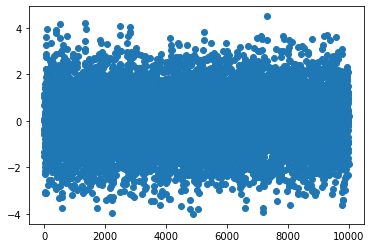

In [ ]:
plt.scatter(time,yt)


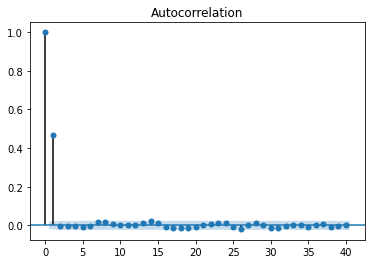

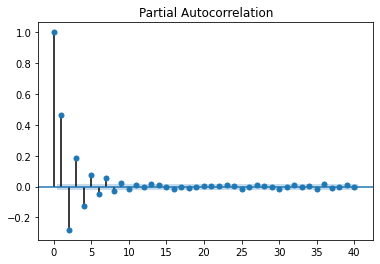

In [ ]:
ma_1_df = pd.DataFrame(yt,index=time)
plot_acf(ma_1_df)
plot_pacf(ma_1_df)
plt.show()

# Class Exercises on analysis

In [ ]:
time = np.arange(100)
ut = np.random.normal(size=110)

Creating the time series process from the given parameters

In [ ]:
yt = []
yt.append(2)
for i in range(1,100):
    yt.append(2 + 1.5*time[i] + 0.5*yt[i-1] + ut[i])

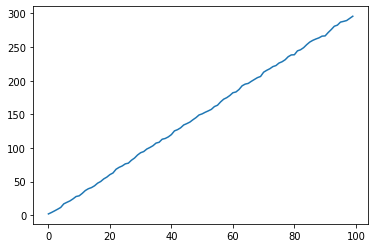

In [ ]:
plt.plot(time,yt)

Running the OLS with one independent variable t

In [ ]:
T = sm.add_constant(time)
linear_model = sm.OLS(yt,T).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.746e+05
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          2.15e-182
Time:                        14:55:04   Log-Likelihood:                -163.63
No. Observations:                 100   AIC:                             331.3
Df Residuals:                      98   BIC:                             336.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8629      0.249      3.462      0.0

Residual sum of squares

In [ ]:
np.sum(np.square(linear_model.resid))

154.45784743694472

OLS with quadratic trend

In [ ]:
T_sq = pd.DataFrame(T,columns=['const','t'],)
T_sq['t^2'] = T_sq['t']**2
sq_model = sm.OLS(yt,T_sq).fit()
print(sq_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.544e+05
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          3.85e-181
Time:                        14:55:04   Log-Likelihood:                -159.63
No. Observations:                 100   AIC:                             325.3
Df Residuals:                      97   BIC:                             333.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1150      0.357      0.323      0.7

Residual sum of squares in Quadratic trend

In [ ]:
np.sum(np.square(sq_model.resid))

142.58124443800176

Trend using moving average

In [ ]:
Tt = pd.Series(yt).rolling(5).mean()[4:]

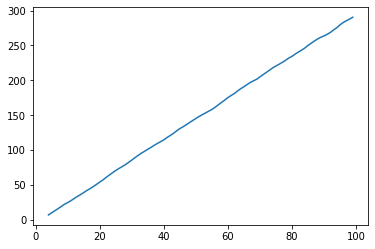

In [ ]:
plt.plot(Tt)

In [ ]:
Residuals = yt[2:-2]-Tt

In [ ]:
np.sum(np.square(Residuals))

68.19120529930805

# Quiz 4

In [ ]:
np.random.seed(1987)
e = np.random.normal(size=500)
time = np.arange(500)

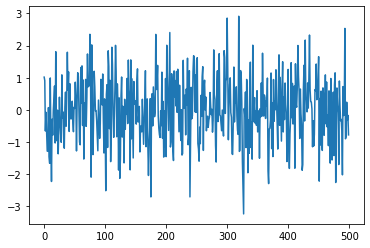

In [ ]:
plt.plot(time,e)

In [ ]:
q4_yt = [] #original Yt data
q4_yt.append(e[0])
for i in range(1,12):
    q4_yt.append(q4_yt[i-1] + e[i] + 0.9*e[i-1])
q4_yt.append(1.4*q4_yt[i-12] + q4_yt[i-1] + e[i] + 0.9*e[i-1])
for i in range(13,24):
    q4_yt.append(-1.4*q4_yt[i-13] + 1.4*q4_yt[i-12] + q4_yt[i-1] + e[i] + 0.9*e[i-1])
q4_yt.append(-0.4*q4_yt[i-24] - 1.4*q4_yt[i-13] + 1.4*q4_yt[i-12] + q4_yt[i-1] + e[i] + 0.9*e[i-1])
for i in range(25,500):
    q4_yt.append(0.4*q4_yt[i-25] - 0.4*q4_yt[i-24] - 1.4*q4_yt[i-13] + 1.4*q4_yt[i-12] + q4_yt[i-1] + e[i] + 0.9*e[i-1])

In [ ]:
q4_yt_transformed = [q4_yt[i] + q4_yt[i-13] - q4_yt[i-12] - q4_yt[i-1] for i in range(13,500) ] #Transformation of data i.e. applying simple differencing and seasonal differencing

In [ ]:
q4_yt_dif = [] # genenration of transformed data
q4_yt_dif.append(e[0])
for i in range(1,12):
    q4_yt_dif.append(e[i] + 0.9*e[i-1])
for i in range(12,500):
    q4_yt_dif.append(0.4*q4_yt_dif[i-12] + e[i] + 0.9*e[i-1])

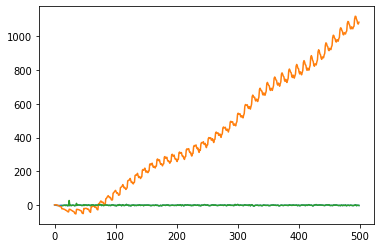

In [ ]:
plt.plot(time,q4_yt_dif) #transformed data generated
plt.plot(time,q4_yt) #original data
plt.plot(time[13:],q4_yt_transformed) #transformed data from original data

Green is the transformed data. Orange represents the original time series Yt data.

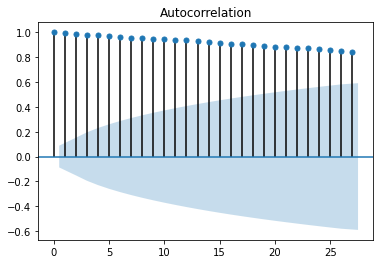

In [ ]:
plot_acf(np.array(q4_yt)); #plots for original data

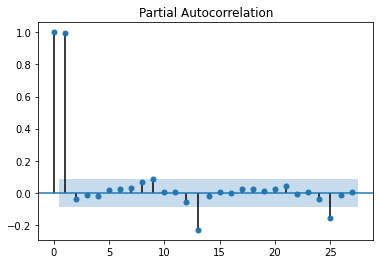

In [ ]:
plot_pacf(np.array(q4_yt));

From the ACF and PACF plots of original data, we cannot conclude anything from the ACF plot, but from the PACF, we get some idea that it is AR(p)x(P) process where some values may be seasonal.

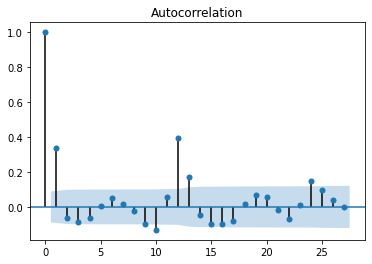

In [ ]:
plot_acf(np.array(q4_yt_transformed)); #plots for transformed data

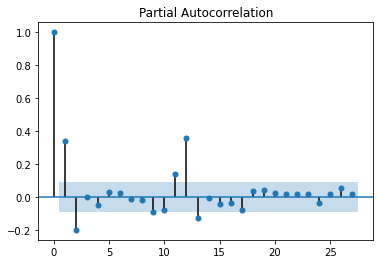

In [ ]:
plot_pacf(np.array(q4_yt_transformed));

On observing the plots of ACF and PACF of transformed i.e. after applying simple and seasonal differencing of order 1, we conclude that there is a spike at lag value of 12 in both ACF and PACF plots, and at lag value of 1, indicating that the function is something of the form SARMA(1,1)X(1,1) for the monthly data.